### preprocessing

In [1]:
#library yang dipakai
import re    
import nltk  
import string 
import warnings 
import numpy as np 
import pandas as pd 
import ast
import seaborn as sns 
import matplotlib.pyplot as plt  

from sklearn.model_selection import KFold,cross_val_score

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Import Tf-idf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the train test split
from sklearn.model_selection import train_test_split

# To evaluate our model
#from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc,roc_auc_score

pd.set_option("display.max_colwidth", 100) 
warnings.filterwarnings("ignore") 

%matplotlib inline

### Input Data

In [39]:
df=pd.read_excel("labeljaya (1) (1).xlsx")

In [40]:
df.head (10) #menampilkan beberapa data pertama

,clean,sentimen
0,"Terima kasih menggunakan layanan, semoga berkah dan sehat selalu. Wassalamualaikum Wr.Wb -Raisa ...",0
1,Whatsapp : 081584114040 - dengan tanda centang hijau (verified)(4),1
2,"pribadi dengan tidak memberikan PIN, Password, Kata sandi dan Kode kepada pihak manapun termasuk...",0
3,"atau mendatangi kantor cabang BSI terdekat dengan membawa KTP, buku tabungan, dan kartu ATM. Har...",0
4,"Assalamualaikum Ramdhani, mohon maaf ketidak nyamanannya. Apabila saldo sudah terpotong dan dan...",1
5,id ini transfer lewat bsi mobile pake bifast kah kak kalau iya bikin lapor coba lewat bsi mobile...,0
6,assalamualaikum kak wempynova mohon maaf atas ketidaknyamanannya kami informasi untuk saat ini t...,0
7,lalu aplikasi bsi mobile apabila kakak ingin tahu langkahlangkah buat adu lalu bsi mobile dapat ...,0
8,transfer dari mandiri ke bsi via mobile bankingbermasalah saldo potong dana ngga masuk gmn nih s...,-1
9,id id saya mau registrasi ulang bsi mobile karena hp saya tadi abis di reset cara seperti apa ya...,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   clean     1000 non-null   object
 1   sentimen  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [41]:
df.dropna(inplace=True) #menghapus data kosong

In [42]:
df['sentimen'] = df['sentimen'].astype(int) #merubah tipe data dari kolom sentimen menjadi integer atau bilangan asli (bukan desimal)

In [43]:
# columns_to_drop = ['tidy_text'] #menghapus kolom tidy_text karena yang dipakai adalah kolom Tweet
# df.drop(columns=columns_to_drop, inplace=True)

In [44]:
df.head(10)

,clean,sentimen
0,"Terima kasih menggunakan layanan, semoga berkah dan sehat selalu. Wassalamualaikum Wr.Wb -Raisa ...",0
1,Whatsapp : 081584114040 - dengan tanda centang hijau (verified)(4),1
2,"pribadi dengan tidak memberikan PIN, Password, Kata sandi dan Kode kepada pihak manapun termasuk...",0
3,"atau mendatangi kantor cabang BSI terdekat dengan membawa KTP, buku tabungan, dan kartu ATM. Har...",0
4,"Assalamualaikum Ramdhani, mohon maaf ketidak nyamanannya. Apabila saldo sudah terpotong dan dan...",1
5,id ini transfer lewat bsi mobile pake bifast kah kak kalau iya bikin lapor coba lewat bsi mobile...,0
6,assalamualaikum kak wempynova mohon maaf atas ketidaknyamanannya kami informasi untuk saat ini t...,0
7,lalu aplikasi bsi mobile apabila kakak ingin tahu langkahlangkah buat adu lalu bsi mobile dapat ...,0
8,transfer dari mandiri ke bsi via mobile bankingbermasalah saldo potong dana ngga masuk gmn nih s...,-1
9,id id saya mau registrasi ulang bsi mobile karena hp saya tadi abis di reset cara seperti apa ya...,0


### kelas positif

In [58]:
df[df['sentimen'] == 1].head(10)

,clean,sentimen
1,Whatsapp : 081584114040 - dengan tanda centang hijau (verified)(4),1
4,"Assalamualaikum Ramdhani, mohon maaf ketidak nyamanannya. Apabila saldo sudah terpotong dan dan...",1
56,mantep banget nih atas kerja transformasibanksyariah bsi sekarang kita bisa investasi emas di bs...,1
57,sama dengan bsi mobile mari investasi uang lalu investasi emas transformasibanksyariah bsi,1
61,serta model kembang layan bentuk aplikasi asabri mobile dan layan asabri link sampai oleh staf a...,1
83,transformasi digital bsi lalu manfaat bsi mobile dan qris mudah urus masjid dalam kelola transaksi,1
84,salur zakat infaq sedekah dan wakaf dapat guna transformasi digital bank syariah indonesia denga...,1
99,bsi transformasi lalu manfaat bsi mobile dan qris mudah urus masjid kelola transaksi masyarakat ...,1
100,guys guys transformasi digital bank syariah indonesia lalu manfaat bsi mobile dan cur itu bisa m...,1
101,bsi manfaat bsi mobile dan qris,1


### Kelas negatif

In [59]:
df[df['sentimen'] == -1].head(10)

,clean,sentimen
8,transfer dari mandiri ke bsi via mobile bankingbermasalah saldo potong dana ngga masuk gmn nih s...,-1
15,id min ini aplikasi bsi mobile di perangkat saya error terus mau tarik tunai tanpa kartu nggak b...,-1
16,id hai admin bsi mohon baik camera qris gk fungsi di app mobile bsi android smfb ya,-1
17,id assalamualaikum min kenapa ya gak bisa buka aplikasi bsi mobile terang rc rooted device detec...,-1
21,bsi mobile tolol error mulu ajg departemen it lu gmna dah kntol,-1
22,id bsi mobile lagi error ya,-1
23,id saya juga gak bisa buka bsi mobile hadehhh id,-1
24,id bsi mobile ada ganggu kah,-1
27,buka rekening online di bsi mobile cuma selfie rekening jadi dapat cashback ribu dengan masuk ko...,-1
28,dengan tingkat guna bsi mobile yang catat besar juta bsi akan terus konsisten transformasi digit...,-1


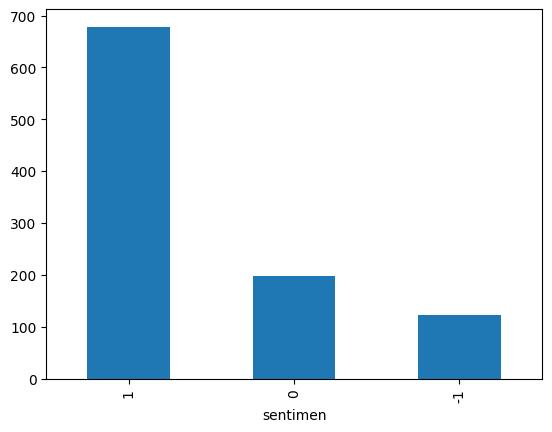

In [60]:
# Let’s have a glimpse at label-distribution in the dataset.
df["sentimen"].value_counts().plot(kind='bar');

In [45]:
df["sentimen"].value_counts() #perbandingan jumlah data di setiap kelas

sentimen
 1    678
 0    199
-1    123
Name: count, dtype: int64

In [46]:
df["sentimen"].value_counts(normalize=True)

sentimen
 1    0.678
 0    0.199
-1    0.123
Name: proportion, dtype: float64

### Text Pre-processing

### 1. Cleansing

In [47]:
#untuk menghilangkan tanda baca, angka, karakter spesial, emotikon, spasi double dll.
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
df['clean'] = df ['clean'].apply(remove_tweet_special)
#menghapus angka
def remove_number(text):
    return  re.sub(r"\d+", "", text)
df['clean'] = df['clean'].apply(remove_number)
#menghapus tanda baca
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))
df['clean'] = df['clean'].apply(remove_punctuation)
#menghapus double spasi
def remove_whitespace_LT(text):
    return text.strip()
df['clean'] = df['clean'].apply(remove_whitespace_LT)
#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)
df['clean'] = df['clean'].apply(remove_whitespace_multiple)
# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)
df['clean'] = df['clean'].apply(remove_singl_char)
df['clean'] = np.vectorize(remove_pattern)(df['clean'], "@[\w]*") 
df.head(10)

,clean,sentimen
0,Terima kasih menggunakan layanan semoga berkah dan sehat selalu Wassalamualaikum WrWb Raisa End,0
1,Whatsapp dengan tanda centang hijau verified,1
2,pribadi dengan tidak memberikan PIN Password Kata sandi dan Kode kepada pihak manapun termasuk p...,0
3,atau mendatangi kantor cabang BSI terdekat dengan membawa KTP buku tabungan dan kartu ATM Harap ...,0
4,Assalamualaikum Ramdhani mohon maaf ketidak nyamanannya Apabila saldo sudah terpotong dan dana b...,1
5,id ini transfer lewat bsi mobile pake bifast kah kak kalau iya bikin lapor coba lewat bsi mobile...,0
6,assalamualaikum kak wempynova mohon maaf atas ketidaknyamanannya kami informasi untuk saat ini t...,0
7,lalu aplikasi bsi mobile apabila kakak ingin tahu langkahlangkah buat adu lalu bsi mobile dapat ...,0
8,transfer dari mandiri ke bsi via mobile bankingbermasalah saldo potong dana ngga masuk gmn nih s...,-1
9,id id saya mau registrasi ulang bsi mobile karena hp saya tadi abis di reset cara seperti apa ya...,0


In [77]:
df.head()

,clean,sentimen
0,Terima kasih menggunakan layanan semoga berkah dan sehat selalu Wassalamualaikum WrWb Raisa End,0
1,Whatsapp dengan tanda centang hijau verified,1
2,pribadi dengan tidak memberikan PIN Password Kata sandi dan Kode kepada pihak manapun termasuk p...,0
3,atau mendatangi kantor cabang BSI terdekat dengan membawa KTP buku tabungan dan kartu ATM Harap ...,0
4,Assalamualaikum Ramdhani mohon maaf ketidak nyamanannya Apabila saldo sudah terpotong dan dana b...,1


### CASE FOLDING

In [48]:
#untuk merubah huruf kapital menjadi huruf kecil
def to_lower(text):
        return text.lower() 

In [49]:
df['case_folding']=df['clean'].apply(to_lower)
df.head(10)

,clean,sentimen,case_folding
0,Terima kasih menggunakan layanan semoga berkah dan sehat selalu Wassalamualaikum WrWb Raisa End,0,terima kasih menggunakan layanan semoga berkah dan sehat selalu wassalamualaikum wrwb raisa end
1,Whatsapp dengan tanda centang hijau verified,1,whatsapp dengan tanda centang hijau verified
2,pribadi dengan tidak memberikan PIN Password Kata sandi dan Kode kepada pihak manapun termasuk p...,0,pribadi dengan tidak memberikan pin password kata sandi dan kode kepada pihak manapun termasuk p...
3,atau mendatangi kantor cabang BSI terdekat dengan membawa KTP buku tabungan dan kartu ATM Harap ...,0,atau mendatangi kantor cabang bsi terdekat dengan membawa ktp buku tabungan dan kartu atm harap ...
4,Assalamualaikum Ramdhani mohon maaf ketidak nyamanannya Apabila saldo sudah terpotong dan dana b...,1,assalamualaikum ramdhani mohon maaf ketidak nyamanannya apabila saldo sudah terpotong dan dana b...
5,id ini transfer lewat bsi mobile pake bifast kah kak kalau iya bikin lapor coba lewat bsi mobile...,0,id ini transfer lewat bsi mobile pake bifast kah kak kalau iya bikin lapor coba lewat bsi mobile...
6,assalamualaikum kak wempynova mohon maaf atas ketidaknyamanannya kami informasi untuk saat ini t...,0,assalamualaikum kak wempynova mohon maaf atas ketidaknyamanannya kami informasi untuk saat ini t...
7,lalu aplikasi bsi mobile apabila kakak ingin tahu langkahlangkah buat adu lalu bsi mobile dapat ...,0,lalu aplikasi bsi mobile apabila kakak ingin tahu langkahlangkah buat adu lalu bsi mobile dapat ...
8,transfer dari mandiri ke bsi via mobile bankingbermasalah saldo potong dana ngga masuk gmn nih s...,-1,transfer dari mandiri ke bsi via mobile bankingbermasalah saldo potong dana ngga masuk gmn nih s...
9,id id saya mau registrasi ulang bsi mobile karena hp saya tadi abis di reset cara seperti apa ya...,0,id id saya mau registrasi ulang bsi mobile karena hp saya tadi abis di reset cara seperti apa ya...


In [81]:
# df.to_(labeljaya (1) (1).xlsx)

### Tokenizing

In [50]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer(r'\w+|$[0-9]+|\S+')
df['Token'] = df['case_folding'].apply(regexp.tokenize)


In [51]:
df.head(10)

,clean,sentimen,case_folding,Token
0,Terima kasih menggunakan layanan semoga berkah dan sehat selalu Wassalamualaikum WrWb Raisa End,0,terima kasih menggunakan layanan semoga berkah dan sehat selalu wassalamualaikum wrwb raisa end,"[terima, kasih, menggunakan, layanan, semoga, berkah, dan, sehat, selalu, wassalamualaikum, wrwb..."
1,Whatsapp dengan tanda centang hijau verified,1,whatsapp dengan tanda centang hijau verified,"[whatsapp, dengan, tanda, centang, hijau, verified]"
2,pribadi dengan tidak memberikan PIN Password Kata sandi dan Kode kepada pihak manapun termasuk p...,0,pribadi dengan tidak memberikan pin password kata sandi dan kode kepada pihak manapun termasuk p...,"[pribadi, dengan, tidak, memberikan, pin, password, kata, sandi, dan, kode, kepada, pihak, manap..."
3,atau mendatangi kantor cabang BSI terdekat dengan membawa KTP buku tabungan dan kartu ATM Harap ...,0,atau mendatangi kantor cabang bsi terdekat dengan membawa ktp buku tabungan dan kartu atm harap ...,"[atau, mendatangi, kantor, cabang, bsi, terdekat, dengan, membawa, ktp, buku, tabungan, dan, kar..."
4,Assalamualaikum Ramdhani mohon maaf ketidak nyamanannya Apabila saldo sudah terpotong dan dana b...,1,assalamualaikum ramdhani mohon maaf ketidak nyamanannya apabila saldo sudah terpotong dan dana b...,"[assalamualaikum, ramdhani, mohon, maaf, ketidak, nyamanannya, apabila, saldo, sudah, terpotong,..."
5,id ini transfer lewat bsi mobile pake bifast kah kak kalau iya bikin lapor coba lewat bsi mobile...,0,id ini transfer lewat bsi mobile pake bifast kah kak kalau iya bikin lapor coba lewat bsi mobile...,"[id, ini, transfer, lewat, bsi, mobile, pake, bifast, kah, kak, kalau, iya, bikin, lapor, coba, ..."
6,assalamualaikum kak wempynova mohon maaf atas ketidaknyamanannya kami informasi untuk saat ini t...,0,assalamualaikum kak wempynova mohon maaf atas ketidaknyamanannya kami informasi untuk saat ini t...,"[assalamualaikum, kak, wempynova, mohon, maaf, atas, ketidaknyamanannya, kami, informasi, untuk,..."
7,lalu aplikasi bsi mobile apabila kakak ingin tahu langkahlangkah buat adu lalu bsi mobile dapat ...,0,lalu aplikasi bsi mobile apabila kakak ingin tahu langkahlangkah buat adu lalu bsi mobile dapat ...,"[lalu, aplikasi, bsi, mobile, apabila, kakak, ingin, tahu, langkahlangkah, buat, adu, lalu, bsi,..."
8,transfer dari mandiri ke bsi via mobile bankingbermasalah saldo potong dana ngga masuk gmn nih s...,-1,transfer dari mandiri ke bsi via mobile bankingbermasalah saldo potong dana ngga masuk gmn nih s...,"[transfer, dari, mandiri, ke, bsi, via, mobile, bankingbermasalah, saldo, potong, dana, ngga, ma..."
9,id id saya mau registrasi ulang bsi mobile karena hp saya tadi abis di reset cara seperti apa ya...,0,id id saya mau registrasi ulang bsi mobile karena hp saya tadi abis di reset cara seperti apa ya...,"[id, id, saya, mau, registrasi, ulang, bsi, mobile, karena, hp, saya, tadi, abis, di, reset, car..."


In [20]:
# df.to_csv("Tokenizing_jaya.csv")

### STOPWORDS REMOVAL

In [52]:
# Pastikan kolom 'Token' hanya berisi string
df['Token'] = df['Token'].astype(str)

# Membuat objek stopword remover
stopword_remover = StopWordRemoverFactory().create_stop_word_remover()

# Menambahkan kolom baru 'stopword_removal'
df['stopword_removal'] = df['Token'].apply(lambda x: stopword_remover.remove(x))
df.head(20)

,clean,sentimen,case_folding,Token,stopword_removal
0,Terima kasih menggunakan layanan semoga berkah dan sehat selalu Wassalamualaikum WrWb Raisa End,0,terima kasih menggunakan layanan semoga berkah dan sehat selalu wassalamualaikum wrwb raisa end,"['terima', 'kasih', 'menggunakan', 'layanan', 'semoga', 'berkah', 'dan', 'sehat', 'selalu', 'was...","['terima', 'kasih', 'menggunakan', 'layanan', 'semoga', 'berkah', 'dan', 'sehat', 'selalu', 'was..."
1,Whatsapp dengan tanda centang hijau verified,1,whatsapp dengan tanda centang hijau verified,"['whatsapp', 'dengan', 'tanda', 'centang', 'hijau', 'verified']","['whatsapp', 'dengan', 'tanda', 'centang', 'hijau', 'verified']"
2,pribadi dengan tidak memberikan PIN Password Kata sandi dan Kode kepada pihak manapun termasuk p...,0,pribadi dengan tidak memberikan pin password kata sandi dan kode kepada pihak manapun termasuk p...,"['pribadi', 'dengan', 'tidak', 'memberikan', 'pin', 'password', 'kata', 'sandi', 'dan', 'kode', ...","['pribadi', 'dengan', 'tidak', 'memberikan', 'pin', 'password', 'kata', 'sandi', 'dan', 'kode', ..."
3,atau mendatangi kantor cabang BSI terdekat dengan membawa KTP buku tabungan dan kartu ATM Harap ...,0,atau mendatangi kantor cabang bsi terdekat dengan membawa ktp buku tabungan dan kartu atm harap ...,"['atau', 'mendatangi', 'kantor', 'cabang', 'bsi', 'terdekat', 'dengan', 'membawa', 'ktp', 'buku'...","['atau', 'mendatangi', 'kantor', 'cabang', 'bsi', 'terdekat', 'dengan', 'membawa', 'ktp', 'buku'..."
4,Assalamualaikum Ramdhani mohon maaf ketidak nyamanannya Apabila saldo sudah terpotong dan dana b...,1,assalamualaikum ramdhani mohon maaf ketidak nyamanannya apabila saldo sudah terpotong dan dana b...,"['assalamualaikum', 'ramdhani', 'mohon', 'maaf', 'ketidak', 'nyamanannya', 'apabila', 'saldo', '...","['assalamualaikum', 'ramdhani', 'mohon', 'maaf', 'ketidak', 'nyamanannya', 'apabila', 'saldo', '..."
5,id ini transfer lewat bsi mobile pake bifast kah kak kalau iya bikin lapor coba lewat bsi mobile...,0,id ini transfer lewat bsi mobile pake bifast kah kak kalau iya bikin lapor coba lewat bsi mobile...,"['id', 'ini', 'transfer', 'lewat', 'bsi', 'mobile', 'pake', 'bifast', 'kah', 'kak', 'kalau', 'iy...","['id', 'ini', 'transfer', 'lewat', 'bsi', 'mobile', 'pake', 'bifast', 'kah', 'kak', 'kalau', 'iy..."
6,assalamualaikum kak wempynova mohon maaf atas ketidaknyamanannya kami informasi untuk saat ini t...,0,assalamualaikum kak wempynova mohon maaf atas ketidaknyamanannya kami informasi untuk saat ini t...,"['assalamualaikum', 'kak', 'wempynova', 'mohon', 'maaf', 'atas', 'ketidaknyamanannya', 'kami', '...","['assalamualaikum', 'kak', 'wempynova', 'mohon', 'maaf', 'atas', 'ketidaknyamanannya', 'kami', '..."
7,lalu aplikasi bsi mobile apabila kakak ingin tahu langkahlangkah buat adu lalu bsi mobile dapat ...,0,lalu aplikasi bsi mobile apabila kakak ingin tahu langkahlangkah buat adu lalu bsi mobile dapat ...,"['lalu', 'aplikasi', 'bsi', 'mobile', 'apabila', 'kakak', 'ingin', 'tahu', 'langkahlangkah', 'bu...","['lalu', 'aplikasi', 'bsi', 'mobile', 'apabila', 'kakak', 'ingin', 'tahu', 'langkahlangkah', 'bu..."
8,transfer dari mandiri ke bsi via mobile bankingbermasalah saldo potong dana ngga masuk gmn nih s...,-1,transfer dari mandiri ke bsi via mobile bankingbermasalah saldo potong dana ngga masuk gmn nih s...,"['transfer', 'dari', 'mandiri', 'ke', 'bsi', 'via', 'mobile', 'bankingbermasalah', 'saldo', 'pot...","['transfer', 'dari', 'mandiri', 'ke', 'bsi', 'via', 'mobile', 'bankingbermasalah', 'saldo', 'pot..."
9,id id saya mau registrasi ulang bsi mobile karena hp saya tadi abis di reset cara seperti apa ya...,0,id id saya mau registrasi ulang bsi mobile karena hp saya tadi abis di reset cara seperti apa ya...,"['id', 'id', 'saya', 'mau', 'registrasi', 'ulang', 'bsi', 'mobile', 'karena', 'hp', 'saya', 'tad...","['id', 'id', 'saya', 'mau', 'registrasi', 'ulang', 'bsi', 'mobile', 'karena', 'hp', 'saya', 'tad..."


In [34]:
#set stopwords to indonesia
factory = StopWordRemoverFactory()
stop= factory.get_stop_words()
print(stop)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [35]:
factory = StopWordRemoverFactory().create_stop_word_remover()
df['stopword_removal'] = df['stopword'].apply(lambda x: stopword_remover.remove(x))

In [38]:
df.head(20)

,clean,sentimen,case_folding,Token,stopword,stopword_removal
0,Terima kasih menggunakan layanan semoga berkah dan sehat selalu Wassalamualaikum WrWb Raisa End,0,terima kasih menggunakan layanan semoga berkah dan sehat selalu wassalamualaikum wrwb raisa end,"['terima', 'kasih', 'menggunakan', 'layanan', 'semoga', 'berkah', 'dan', 'sehat', 'selalu', 'was...","['terima', 'kasih', 'menggunakan', 'layanan', 'semoga', 'berkah', 'dan', 'sehat', 'selalu', 'was...","['terima', 'kasih', 'menggunakan', 'layanan', 'semoga', 'berkah', 'dan', 'sehat', 'selalu', 'was..."
1,Whatsapp dengan tanda centang hijau verified,1,whatsapp dengan tanda centang hijau verified,"['whatsapp', 'dengan', 'tanda', 'centang', 'hijau', 'verified']","['whatsapp', 'dengan', 'tanda', 'centang', 'hijau', 'verified']","['whatsapp', 'dengan', 'tanda', 'centang', 'hijau', 'verified']"
2,pribadi dengan tidak memberikan PIN Password Kata sandi dan Kode kepada pihak manapun termasuk p...,0,pribadi dengan tidak memberikan pin password kata sandi dan kode kepada pihak manapun termasuk p...,"['pribadi', 'dengan', 'tidak', 'memberikan', 'pin', 'password', 'kata', 'sandi', 'dan', 'kode', ...","['pribadi', 'dengan', 'tidak', 'memberikan', 'pin', 'password', 'kata', 'sandi', 'dan', 'kode', ...","['pribadi', 'dengan', 'tidak', 'memberikan', 'pin', 'password', 'kata', 'sandi', 'dan', 'kode', ..."
3,atau mendatangi kantor cabang BSI terdekat dengan membawa KTP buku tabungan dan kartu ATM Harap ...,0,atau mendatangi kantor cabang bsi terdekat dengan membawa ktp buku tabungan dan kartu atm harap ...,"['atau', 'mendatangi', 'kantor', 'cabang', 'bsi', 'terdekat', 'dengan', 'membawa', 'ktp', 'buku'...","['atau', 'mendatangi', 'kantor', 'cabang', 'bsi', 'terdekat', 'dengan', 'membawa', 'ktp', 'buku'...","['atau', 'mendatangi', 'kantor', 'cabang', 'bsi', 'terdekat', 'dengan', 'membawa', 'ktp', 'buku'..."
4,Assalamualaikum Ramdhani mohon maaf ketidak nyamanannya Apabila saldo sudah terpotong dan dana b...,1,assalamualaikum ramdhani mohon maaf ketidak nyamanannya apabila saldo sudah terpotong dan dana b...,"['assalamualaikum', 'ramdhani', 'mohon', 'maaf', 'ketidak', 'nyamanannya', 'apabila', 'saldo', '...","['assalamualaikum', 'ramdhani', 'mohon', 'maaf', 'ketidak', 'nyamanannya', 'apabila', 'saldo', '...","['assalamualaikum', 'ramdhani', 'mohon', 'maaf', 'ketidak', 'nyamanannya', 'apabila', 'saldo', '..."
5,id ini transfer lewat bsi mobile pake bifast kah kak kalau iya bikin lapor coba lewat bsi mobile...,0,id ini transfer lewat bsi mobile pake bifast kah kak kalau iya bikin lapor coba lewat bsi mobile...,"['id', 'ini', 'transfer', 'lewat', 'bsi', 'mobile', 'pake', 'bifast', 'kah', 'kak', 'kalau', 'iy...","['id', 'ini', 'transfer', 'lewat', 'bsi', 'mobile', 'pake', 'bifast', 'kah', 'kak', 'kalau', 'iy...","['id', 'ini', 'transfer', 'lewat', 'bsi', 'mobile', 'pake', 'bifast', 'kah', 'kak', 'kalau', 'iy..."
6,assalamualaikum kak wempynova mohon maaf atas ketidaknyamanannya kami informasi untuk saat ini t...,0,assalamualaikum kak wempynova mohon maaf atas ketidaknyamanannya kami informasi untuk saat ini t...,"['assalamualaikum', 'kak', 'wempynova', 'mohon', 'maaf', 'atas', 'ketidaknyamanannya', 'kami', '...","['assalamualaikum', 'kak', 'wempynova', 'mohon', 'maaf', 'atas', 'ketidaknyamanannya', 'kami', '...","['assalamualaikum', 'kak', 'wempynova', 'mohon', 'maaf', 'atas', 'ketidaknyamanannya', 'kami', '..."
7,lalu aplikasi bsi mobile apabila kakak ingin tahu langkahlangkah buat adu lalu bsi mobile dapat ...,0,lalu aplikasi bsi mobile apabila kakak ingin tahu langkahlangkah buat adu lalu bsi mobile dapat ...,"['lalu', 'aplikasi', 'bsi', 'mobile', 'apabila', 'kakak', 'ingin', 'tahu', 'langkahlangkah', 'bu...","['lalu', 'aplikasi', 'bsi', 'mobile', 'apabila', 'kakak', 'ingin', 'tahu', 'langkahlangkah', 'bu...","['lalu', 'aplikasi', 'bsi', 'mobile', 'apabila', 'kakak', 'ingin', 'tahu', 'langkahlangkah', 'bu..."
8,transfer dari mandiri ke bsi via mobile bankingbermasalah saldo potong dana ngga ma

In [86]:
df.head(100)

,clean,sentimen,case_folding,Token,stopword
0,Terima kasih menggunakan layanan semoga berkah dan sehat selalu Wassalamualaikum WrWb Raisa End,0,terima kasih menggunakan layanan semoga berkah dan sehat selalu wassalamualaikum wrwb raisa end,"['terima', 'kasih', 'menggunakan', 'layanan', 'semoga', 'berkah', 'dan', 'sehat', 'selalu', 'was...","['terima', 'kasih', 'menggunakan', 'layanan', 'semoga', 'berkah', 'dan', 'sehat', 'selalu', 'was..."
1,Whatsapp dengan tanda centang hijau verified,1,whatsapp dengan tanda centang hijau verified,"['whatsapp', 'dengan', 'tanda', 'centang', 'hijau', 'verified']","['whatsapp', 'dengan', 'tanda', 'centang', 'hijau', 'verified']"
2,pribadi dengan tidak memberikan PIN Password Kata sandi dan Kode kepada pihak manapun termasuk p...,0,pribadi dengan tidak memberikan pin password kata sandi dan kode kepada pihak manapun termasuk p...,"['pribadi', 'dengan', 'tidak', 'memberikan', 'pin', 'password', 'kata', 'sandi', 'dan', 'kode', ...","['pribadi', 'dengan', 'tidak', 'memberikan', 'pin', 'password', 'kata', 'sandi', 'dan', 'kode', ..."
3,atau mendatangi kantor cabang BSI terdekat dengan membawa KTP buku tabungan dan kartu ATM Harap ...,0,atau mendatangi kantor cabang bsi terdekat dengan membawa ktp buku tabungan dan kartu atm harap ...,"['atau', 'mendatangi', 'kantor', 'cabang', 'bsi', 'terdekat', 'dengan', 'membawa', 'ktp', 'buku'...","['atau', 'mendatangi', 'kantor', 'cabang', 'bsi', 'terdekat', 'dengan', 'membawa', 'ktp', 'buku'..."
4,Assalamualaikum Ramdhani mohon maaf ketidak nyamanannya Apabila saldo sudah terpotong dan dana b...,1,assalamualaikum ramdhani mohon maaf ketidak nyamanannya apabila saldo sudah terpotong dan dana b...,"['assalamualaikum', 'ramdhani', 'mohon', 'maaf', 'ketidak', 'nyamanannya', 'apabila', 'saldo', '...","['assalamualaikum', 'ramdhani', 'mohon', 'maaf', 'ketidak', 'nyamanannya', 'apabila', 'saldo', '..."
...,...,...,...,...,...
95,manfaat fasilitas bsi mobile dan qris akan mudah sistem transaksi,0,manfaat fasilitas bsi mobile dan qris akan mudah sistem transaksi,"['manfaat', 'fasilitas', 'bsi', 'mobile', 'dan', 'qris', 'akan', 'mudah', 'sistem', 'transaksi']","['manfaat', 'fasilitas', 'bsi', 'mobile', 'dan', 'qris', 'akan', 'mudah', 'sistem', 'transaksi']"
96,bsi sudah laku transformasi digital lalu bsi mobile,0,bsi sudah laku transformasi digital lalu bsi mobile,"['bsi', 'sudah', 'laku', 'transformasi', 'digital', 'lalu', 'bsi', 'mobile']","['bsi', 'sudah', 'laku', 'transformasi', 'digital', 'lalu', 'bsi', 'mobile']"
97,transformasi digital bsi lalu pemanfaatab bsi mobile dan qris,0,transformasi digital bsi lalu pemanfaatab bsi mobile dan qris,"['transformasi', 'digital', 'bsi', 'lalu', 'pemanfaatab', 'bsi', 'mobile', 'dan', 'qris']","['transformasi', 'digital', 'bsi', 'lalu', 'pemanfaatab', 'bsi', 'mobile', 'dan', 'qris']"
98,makin mudah transformasi digital bsi lalu qris dan bsi mobile,0,makin mudah transformasi digital bsi lalu qris dan bsi mobile,"['makin', 'mudah', 'transformasi', 'digital', 'bsi', 'lalu', 'qris', 'dan', 'bsi', 'mobile']","['makin', 'mudah', 'transformasi', 'digital', 'bsi', 'lalu', 'qris', 'dan', 'bsi', 'mobile']"


### Stemming

In [25]:
#Stemming the text
factory = StemmerFactory()
ps = factory.create_stemmer()

def simple_stemmer(text):
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

In [26]:
#Apply function on text column
df['stemmed']=df['stopword'].apply(simple_stemmer)
df.head(10)

,sentimen,clean,case_folding,Token,stopword,stemmed
0,-1,Menyejukkan luar biasa tapi bagi pembenci Anies Baswedan ini adalah pukulan telak atas mereka yg...,menyejukkan luar biasa tapi bagi pembenci anies baswedan ini adalah pukulan telak atas mereka yg...,"['menyejukkan', 'luar', 'biasa', 'tapi', 'bagi', 'pembenci', 'anies', 'baswedan', 'ini', 'adalah...","['menyejukkan', 'luar', 'biasa', 'tapi', 'bagi', 'pembenci', 'anies', 'baswedan', 'ini', 'adalah...",sejuk luar biasa tapi bagi benci anies baswedan ini adalah pukul telak atas mereka yg ingin jega...
1,-1,Repost dari Kebakaran terjadi di Gang Lapo Sona Kelurahan Baringin Kota Sibolga Sumatera Utara,repost dari kebakaran terjadi di gang lapo sona kelurahan baringin kota sibolga sumatera utara,"['repost', 'dari', 'kebakaran', 'terjadi', 'di', 'gang', 'lapo', 'sona', 'kelurahan', 'baringin'...","['repost', 'dari', 'kebakaran', 'terjadi', 'di', 'gang', 'lapo', 'sona', 'kelurahan', 'baringin'...",repost dari bakar jadi di gang lapo sona lurah baringin kota sibolga sumatera utara
2,-1,Kasihan Kadrun yah partai nya sudah mau tahun engga dapet jabatan Menteri makanya kadrun sangat ...,kasihan kadrun yah partai nya sudah mau tahun engga dapet jabatan menteri makanya kadrun sangat ...,"['kasihan', 'kadrun', 'yah', 'partai', 'nya', 'sudah', 'mau', 'tahun', 'engga', 'dapet', 'jabata...","['kasihan', 'kadrun', 'yah', 'partai', 'nya', 'sudah', 'mau', 'tahun', 'engga', 'dapet', 'jabata...",kasihan kadrun yah partai nya sudah mau tahun engga dapet jabat menteri makanya kadrun sangat me...
3,1,Repost dari Bantuan gerobak gratis dari Partai Perindo berdampak langsung meningkatkan perekonom...,repost dari bantuan gerobak gratis dari partai perindo berdampak langsung meningkatkan perekonom...,"['repost', 'dari', 'bantuan', 'gerobak', 'gratis', 'dari', 'partai', 'perindo', 'berdampak', 'la...","['repost', 'dari', 'bantuan', 'gerobak', 'gratis', 'dari', 'partai', 'perindo', 'berdampak', 'la...",repost dari bantu gerobak gratis dari partai perindo dampak langsung tingkat ekonomi warga
4,1,wy Pemimpin Muda Inovatif dan Kreatif di dukung penuh generasi milenial Pemimpin muda yang punya...,wy pemimpin muda inovatif dan kreatif di dukung penuh generasi milenial pemimpin muda yang punya...,"['wy', 'pemimpin', 'muda', 'inovatif', 'dan', 'kreatif', 'di', 'dukung', 'penuh', 'generasi', 'm...","['wy', 'pemimpin', 'muda', 'inovatif', 'dan', 'kreatif', 'di', 'dukung', 'penuh', 'generasi', 'm...",wy pimpin muda inovatif dan kreatif di dukung penuh generasi milenial pimpin muda yang punya ban...
5,1,Simpatisan Jokowi di Ponorogo mendeklarasikan dukungan untuk Prabowo Subianto pada Pilpres Gerin...,simpatisan jokowi di ponorogo mendeklarasikan dukungan untuk prabowo subianto pada pilpres gerin...,"['simpatisan', 'jokowi', 'di', 'ponorogo', 'mendeklarasikan', 'dukungan', 'untuk', 'prabowo', 's...","['simpatisan', 'jokowi', 'di', 'ponorogo', 'mendeklarasikan', 'dukungan', 'untuk', 'prabowo', 's...",simpatisan jokowi di ponorogo deklarasi dukung untuk prabowo subianto pada pilpres gerindra yaki...
6,1,Dulu WORLD surveyjika pilpres dilakukan sekarang maka pemenangnyaAnies Baswedan Itu dulu bbrp bu...,dulu world surveyjika pilpres dilakukan sekarang maka pemenangnyaanies baswedan itu dulu bbrp bu...,"['dulu', 'world', 'surveyjika', 'pilpres', 'dilakukan', 'sekarang', 'maka', 'pemenangnyaanies', ...","['dulu', 'world', 'surveyjika', 'pilpres', 'dilakukan', 'sekarang', 'maka', 'pemenangnyaanies', ...",dulu world surveyjika pilpres laku sekarang maka pemenangnyaanies baswedan itu dulu bbrp bulan y...
7,1,Mahkamah Konstitusi Jadi Wasit yang Adil Tangani Sengketa Pemilu Kami sangat berharap MK melakuk...,mahkamah konstitusi jadi wasit yang adil tangani sengketa pemilu kami sangat berharap mk melakuk...,"['mahkamah', 'konstitusi', 'jadi', 'wasit', 'yang', 'adil', 'tangani', 'sengketa', 'pemilu', 'ka...","['mahkamah', 'konstitusi', 'jadi', 'wasit', 'yang', 'adil', 'tangani', 'sengketa', 'pemilu', 'ka...",mahkamah konstit

In [34]:
# columns_to_drop = ['cleaned', 'Token',]
# df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# df.to_csv('stemmingjaya.csv')